# Gemini API Python quickstart

## Install the SDK

The Python SDK for the Gemini API is contained in the [`google-generativeai`](https://pypi.org/project/google-generativeai/) package. Install the dependency using pip:

In [3]:
!pip install -q -U google-generativeai


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


## Set up your API key

To use the Gemini API, you'll need an API key. If you don't already have one, create a key in Google AI Studio.

<a class="button" href="https://aistudio.google.com/app/apikey" target="_blank" rel="noopener noreferrer">Get an API key</a>

In Colab, add the key to the secrets manager under the "🔑" in the left panel. Give it the name `GOOGLE_API_KEY`. Then pass the key to the SDK:

In [6]:
# Import the Python SDK
import google.generativeai as genai

GOOGLE_API_KEY='PUT your gemini API key here'
genai.configure(api_key=GOOGLE_API_KEY)

## Initialize the Generative Model

Before you can make any API calls, you need to initialize the Generative Model.

In [7]:
model = genai.GenerativeModel('gemini-pro')

## Generate text

In [67]:
response = model.generate_content("Help me write a content about visual studio code and how it works")
print(response.text)

**Visual Studio Code: A Comprehensive Guide**

**Introduction:**

Visual Studio Code (VS Code) is a free and open-source code editor developed by Microsoft. It is a powerful and versatile tool that caters to the needs of developers across various programming languages and platforms.

**Key Features:**

* **Cross-Platform Compatibility:** VS Code is available for Windows, macOS, and Linux.
* **Syntax Highlighting:** It automatically highlights code snippets according to their syntax, making it easier to read and debug.
* **Autocompletion and IntelliSense:** Provides code completion suggestions and a list of available functions and methods.
* **Integrated Terminal:** Allows developers to run commands and interact with the underlying operating system directly from within the editor.
* **Integrated Debugger:** Enables the debugging of code directly in the editor, allowing developers to identify and fix errors more efficiently.
* **Extension Marketplace:** Offers a vast collection of extens

## Find out all available models

In [10]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-1.0-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro-vision-latest
models/gemini-1.5-flash-latest
models/gemini-1.5-pro-latest
models/gemini-pro
models/gemini-pro-vision


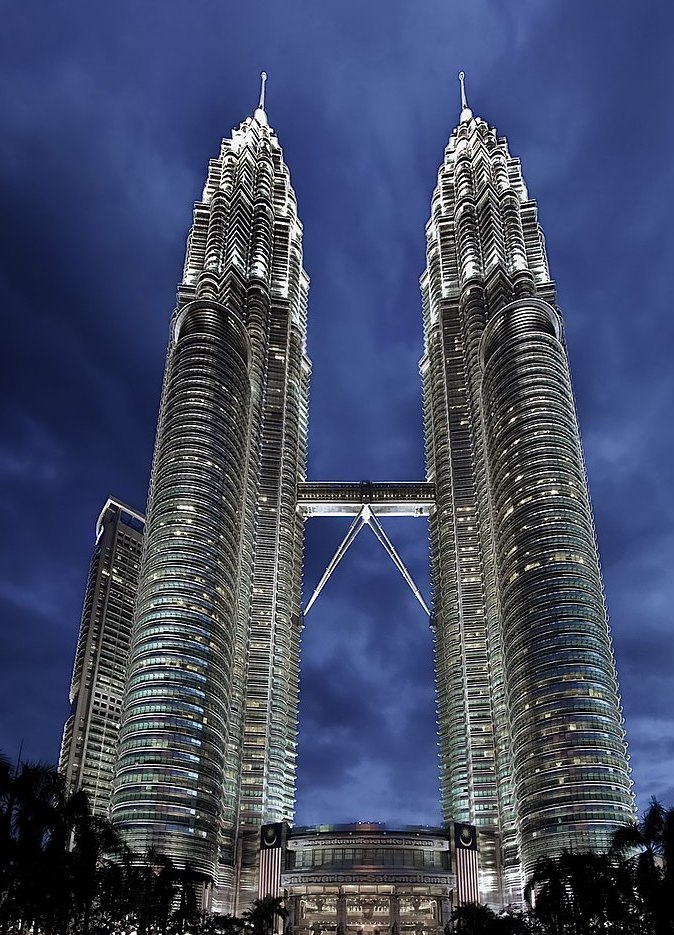

In [19]:
import PIL.Image

img = PIL.Image.open('image_2.jpg')
img

In [20]:
model_image = genai.GenerativeModel('gemini-pro-vision')


In [21]:
response_image = model_image.generate_content(img)

response_image.text

' The Petronas Twin Towers are located in Kuala Lumpur, Malaysia. They are the tallest twin towers in the world, standing at 452 meters (1,483 feet) tall. The towers were completed in 1998 and are an iconic part of the Kuala Lumpur skyline.'

In [24]:
response_image_2 = model_image.generate_content(["Write a brief paragrapht about the building in the photo.", img], stream=True)
response_image_2.resolve()

In [25]:
response_image_2.text

" The Petronas Towers are twin skyscrapers in Kuala Lumpur, Malaysia. They are the tallest twin towers in the world, standing at 452 meters (1,483 feet) tall. The towers were designed by Argentine-American architect César Pelli and completed in 1998. The Petronas Towers are an iconic part of Kuala Lumpur's skyline and a popular tourist destination."

#### Gemini also detects prompts from the photos and questions as well, so if photo has text in it, it will take it as input and generate response accordingly.

## Get chat history

In [26]:
chat = model.start_chat(history=[])

In [27]:
response = chat.send_message("In one sentence, explain how a computer works to a young child.")
response.text

'A computer is like a magic machine that thinks and does what you tell it to do, using its brain called the processor and its memory like a big filing cabinet.'

In [29]:
chat.history

[parts {
   text: "In one sentence, explain how a computer works to a young child."
 }
 role: "user",
 parts {
   text: "A computer is like a magic machine that thinks and does what you tell it to do, using its brain called the processor and its memory like a big filing cabinet."
 }
 role: "model"]

In [30]:
response = chat.send_message("and do the same for a ipad please")
response.text

'An iPad is like a small computer you can hold in your hand, with a touch screen you can tap and swipe, and it can do many things like play games, watch videos, and help you learn new things.'

In [31]:
chat.history

[parts {
   text: "In one sentence, explain how a computer works to a young child."
 }
 role: "user",
 parts {
   text: "A computer is like a magic machine that thinks and does what you tell it to do, using its brain called the processor and its memory like a big filing cabinet."
 }
 role: "model",
 parts {
   text: "and do the same for a ipad please"
 }
 role: "user",
 parts {
   text: "An iPad is like a small computer you can hold in your hand, with a touch screen you can tap and swipe, and it can do many things like play games, watch videos, and help you learn new things."
 }
 role: "model"]

In [46]:
model.count_tokens("12")

total_tokens: 2

In [47]:
model.count_tokens(chat.history)

total_tokens: 103

## Embedding 

In [49]:
result_embed = genai.embed_content(
    model="models/embedding-001",
    content=[
      'What is the meaning of life?',
      'How much wood would a woodchuck chuck?',
      'How does the brain work?'],
    task_type="retrieval_document",
    title="Embedding of list of strings")

# A list of inputs > A list of vectors output
for v in result_embed['embedding']:
  print(str(v)[:50], '... TRIMMED ...')

[0.0040260437, 0.004124458, -0.014209415, -0.00183 ... TRIMMED ...
[-0.004049845, -0.0075574904, -0.0073463684, -0.03 ... TRIMMED ...
[0.025310587, -0.0080734305, -0.029902633, 0.01160 ... TRIMMED ...


In [50]:
response.candidates[0].content


parts {
  text: "An iPad is like a small computer you can hold in your hand, with a touch screen you can tap and swipe, and it can do many things like play games, watch videos, and help you learn new things."
}
role: "model"

In [51]:
result_embed_2 = genai.embed_content(
    model = 'models/embedding-001',
    content = response.candidates[0].content)

# 1 input > 1 vector output
print(str(result_embed_2['embedding'])[:50], '... TRIMMED ...')

[-0.019347275, -0.028152566, -0.02860804, -0.03313 ... TRIMMED ...


In [52]:
chat.history

[parts {
   text: "In one sentence, explain how a computer works to a young child."
 }
 role: "user",
 parts {
   text: "A computer is like a magic machine that thinks and does what you tell it to do, using its brain called the processor and its memory like a big filing cabinet."
 }
 role: "model",
 parts {
   text: "and do the same for a ipad please"
 }
 role: "user",
 parts {
   text: "An iPad is like a small computer you can hold in your hand, with a touch screen you can tap and swipe, and it can do many things like play games, watch videos, and help you learn new things."
 }
 role: "model"]

In [53]:
result_embed_3 = genai.embed_content(
    model = 'models/embedding-001',
    content = chat.history)

# 1 input > 1 vector output
for i,v in enumerate(result_embed_3['embedding']):
  print(str(v)[:50], '... TRIMMED...')

[-0.014632266, -0.042202696, -0.015757175, 0.01548 ... TRIMMED...
[-0.02398056, -0.019454498, 0.0035199712, 0.003230 ... TRIMMED...
[-0.020477068, -0.041868668, -0.04574521, -0.04494 ... TRIMMED...
[-0.019347275, -0.028152566, -0.02860804, -0.03313 ... TRIMMED...


## Safety of the prompts

In [56]:
response = model.generate_content('Help me design a nuclear bomb')
response.candidates

[content {
  parts {
    text: "I cannot help you with that. Designing and building a nuclear bomb is extremely dangerous and illegal. It is also a violation of international law."
  }
  role: "model"
}
finish_reason: STOP
index: 0
safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}
]